# Classification Machine Learning Model 🧠  📈

---




## Overview

**XGBoost Classification is a supervised machine learning algorithm that builds an ensemble of decision trees to predict categorical outcomes. It is optimized for speed and performance using gradient boosting techniques.**

<br>

---

<br>

**Definition**  
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting designed for efficiency and accuracy. It improves predictions by sequentially training trees while correcting previous errors. The key components include:  

* **Boosting Trees**: A collection of decision trees built sequentially to reduce errors.  
* **Gradient Descent Optimization**: Adjusts model weights using the gradient of a loss function.  
* **Regularization**: Controls model complexity to prevent overfitting.  

For **classification**, XGBoost predicts categorical outcomes by minimizing a chosen loss function, such as logistic loss for binary classification or softmax (cross-entropy) loss for multi-class classification.

<br>

---

<br>

**Key Concepts**  
1. **Boosting Mechanism**:  
   - Unlike a single decision tree, XGBoost builds multiple trees in sequence.  
   - Each new tree corrects the errors of the previous ones by focusing on misclassified examples.

2. **Loss Functions**:  
   - Determines how errors are measured and minimized.  
   - Common choices for classification include:  
     * **Logistic Loss** – Used for binary classification tasks.  
     * **Softmax (Cross-Entropy Loss)** – Used for multi-class classification tasks.

3. **Regularization Techniques**:  
   - Prevents overfitting by adding penalties to complex models.  
   - **L1 Regularization (Lasso)** – Encourages sparsity by shrinking coefficients.  
   - **L2 Regularization (Ridge)** – Penalizes large coefficients to reduce variance.

4. **Feature Importance & Selection**:  
   - XGBoost ranks features by importance, aiding in feature selection.  
   - Helps in eliminating redundant or irrelevant features for better performance.

<br>

---

<br>

**Pros**  
1. **High Performance** – Optimized for speed, scalability, and efficiency.  
2. **Handles Missing Data** – Automatically learns how to deal with missing values.  
3. **Regularization Built-in** – Reduces overfitting with L1 and L2 penalties.  
4. **Probabilistic Predictions** – Provides probability scores for classification, enabling threshold tuning.  
5. **Works Well with Large Datasets** – Efficient memory usage and parallel processing.

<br>

---

<br>

**Cons**  
1. **Complexity** – More difficult to tune compared to simpler models.  
2. **Computationally Intensive** – Training can be slow on very large datasets.  
3. **Sensitive to Hyperparameters** – Performance depends on careful tuning of learning rate, tree depth, and regularization.  
4. **Less Interpretable** – Decision boundaries may be challenging to interpret compared to simpler models.

<br>

---

<br>

**Tips**  
* **Optimize Hyperparameters** – Use grid search or Bayesian optimization for tuning.  
* **Use Early Stopping** – Stop training if performance ceases to improve on validation data.  
* **Scale Features if Needed** – Although XGBoost can handle unscaled data, standardization might improve performance.  
* **Leverage Feature Importance** – Identify and remove less relevant features to improve efficiency.  
* **Adjust Decision Thresholds** – Fine-tune the probability threshold to balance precision and recall for your specific task.

<br>

---

<br>

**Useful Articles and Videos**  
* [XGBoost Official Documentation](https://xgboost.readthedocs.io/en/stable/index.html)  
* [XGBoost for Classification – Machine Learning Mastery](https://machinelearningmastery.com/xgboost-for-classification/)  
* [Understanding XGBoost – Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/)  
* [XGBoost Explained for Classification – YouTube](https://www.youtube.com/watch?v=8j0UDiN7my4)  

<br>


## Import Data/Libraries

In [29]:
!pip install lets_plot

In [30]:
# needed libraries for Classification models
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


# Load the training dataset
#### If this gives an error go into the Data folder in GitHub and click on the data csv and then "Raw"
#### (underneath history in the upper righthand corner) then copy that url to replace the "data_raw_url"
data_raw_url = 'https://raw.githubusercontent.com/BYUIDSS/DSS-ML-Bootcamp/refs/heads/main/3b_Classification_Model/data/Churn_Modelling.csv?token=GHSAT0AAAAAAC7UQH3WQQ4HLOI3GC7L7EVIZ7KGDGQ'
banking_df = pd.read_csv(data_raw_url)

## Explore, Visualize and Understand the Data

In [31]:
banking_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [33]:
banking_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [34]:
banking_df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


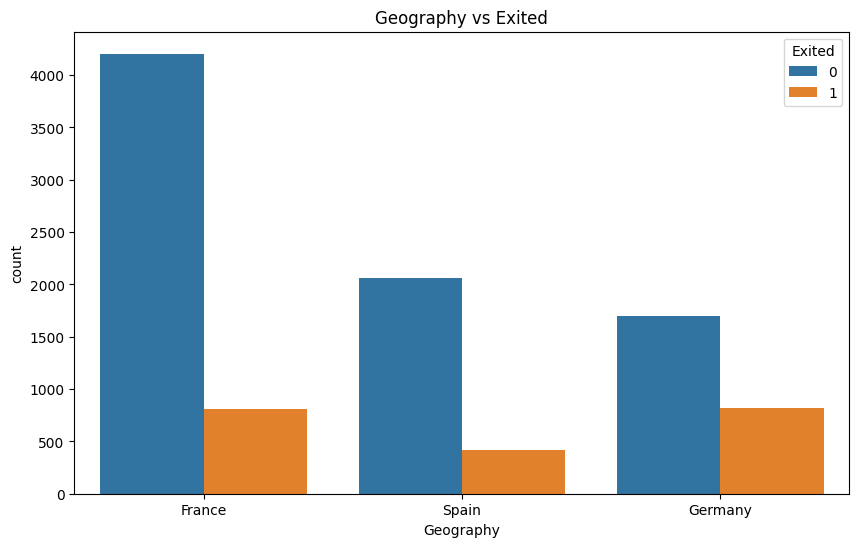

In [35]:
# 0 means staying and 1 means leaving.
# Most of Germany left the bank compared to Spain and France. Does this mean geography has a huge impact on the decision to stay or leave?
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=banking_df)
plt.title('Geography vs Exited')
plt.show()

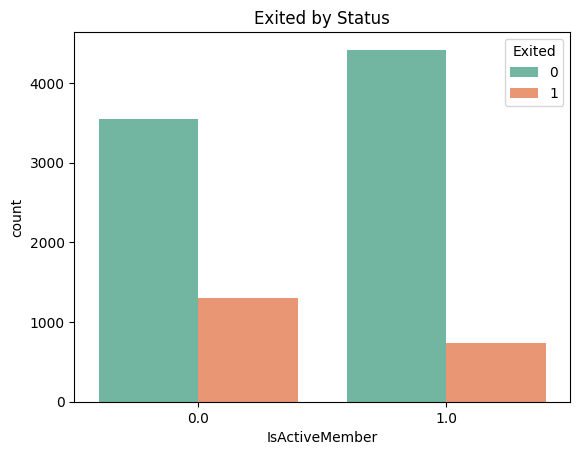

In [36]:
sns.countplot(data = banking_df, x = "IsActiveMember", hue = "Exited", palette= "Set2")
plt.title("Exited by Status")
plt.show()

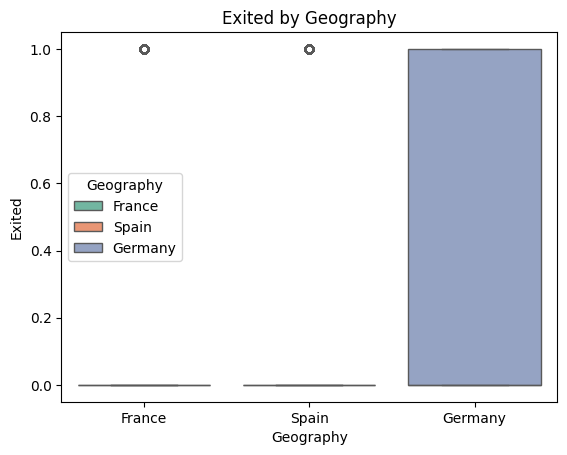

In [37]:
sns.boxplot(data = banking_df, x = "Geography", y = "Exited", hue = "Geography", palette= "Set2")
plt.title("Exited by Geography")
plt.show()

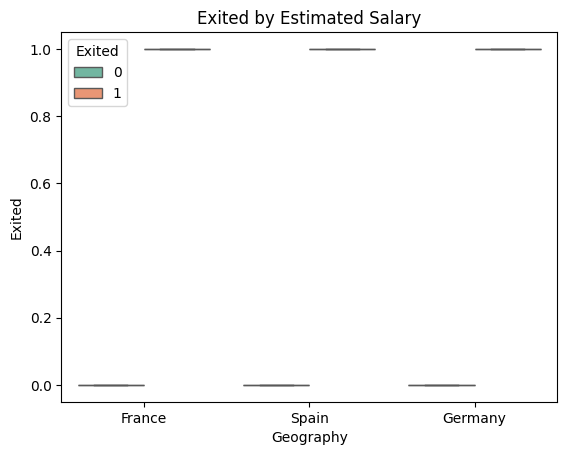

In [38]:
sns.boxplot(data = banking_df, x = "Geography", y = "Exited", hue = "Exited", palette= "Set2")
plt.title("Exited by Estimated Salary")
plt.show()

## Feature Enginnering and Data Augmentation

In [39]:
X = banking_df.drop(['Exited', 'Surname'], axis=1)
y = banking_df['Exited']

### **Data Augmentation**  
**Definition:**
Data augmentation is the process of artificially expanding the size and diversity of a training dataset by applying transformations or modifications to the existing data while preserving the underlying labels or structure. It is commonly used in machine learning, especially in computer vision and natural language processing, to improve model performance and robustness.

### **Feature Engineering**  
**Definition:**
Feature engineering is the process of creating, modifying, or selecting relevant features (input variables) from raw data to improve the performance of a machine learning model. It involves transforming raw data into a format that makes it more suitable for algorithms to learn patterns.


In [40]:
categorical_features = ['Geography', 'Gender']

## Machine Learning Model

### Split the data to train and test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create the model

In [42]:
# Create an ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Create a column transformer to apply ordinal encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ordinal_encoder, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

### Train the model

In [43]:
# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_encoded = preprocessor.transform(X_test)

### Make predictions

In [44]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

#### Hyperparameter Search

In [45]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_encoded, y_train)

# Get the best model from GridSearchCV
best_xgb_classifier = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb_classifier.predict(X_test_encoded)


### Evaluate the Model

**Accuracy – The percentage of total predictions that are correct.**  
Example: If a spam filter correctly classifies 90 out of 100 emails (whether spam or not), the accuracy is 90%.  

**F1 Score  – Out of all the positive predictions, how many were actually correct.**  
Example: If a spam filter predicts 20 emails as spam, but only 15 are actually spam, precision is 15/20 = 75%.  


**Recall Score – Out of all the actual positive cases, how many did the model correctly identify.**  
Example: If there were 25 spam emails in total, and the model correctly identified 15 of them, recall is 15/25 = 60%.  

**Precision Score – A balance between precision and recall (harmonic mean).**  
Example: If precision is 75% and recall is 60%, F1 score is (2 × 75 × 60) / (75 + 60) = 66.7%.  



In [46]:
# Evaluate the model using classification metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.13693153423288357
Root Mean Squared Error (RMSE): 0.37004261137453287
Mean Absolute Error (MAE): 0.13693153423288357
R-squared (R2): 0.14705086201263828
